<a href="https://colab.research.google.com/github/nagmafarez/IDS-Assignment/blob/main/new_DL_Classification_Project_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load and Explore the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the dataset
insurance_data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset to understand its structure
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. Data Exploration (EDA)

Distribution of Charges

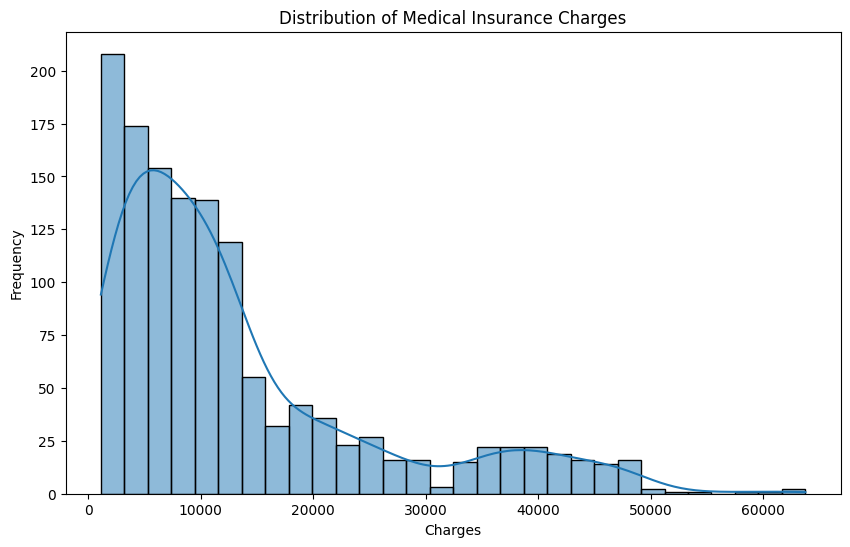

In [3]:
# Plotting the distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['charges'], kde=True, bins=30)
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# The distribution of insurance charges is skewed to the right.

Impact of Smoking on Charges

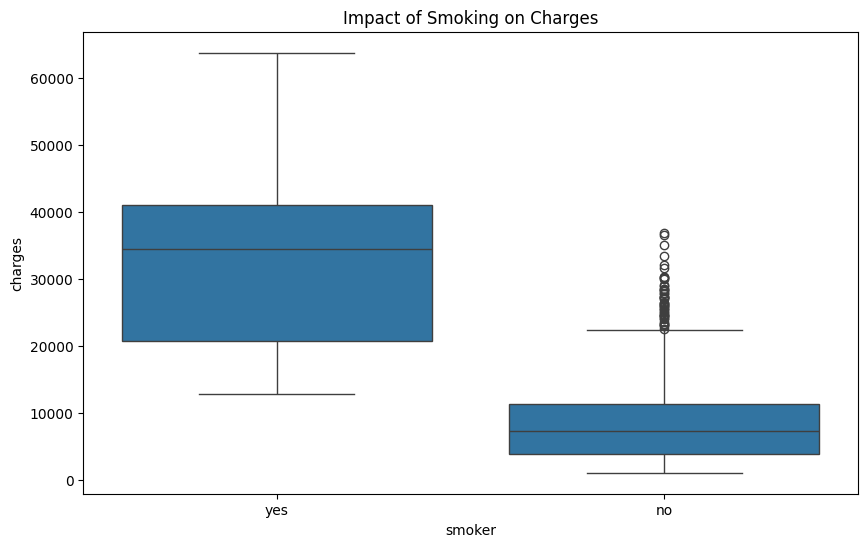

In [4]:
# Analyze the impact of smoking on charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_data)
plt.title('Impact of Smoking on Charges')
plt.show()


Boxplots for BMI vs Charges and Age vs Charges

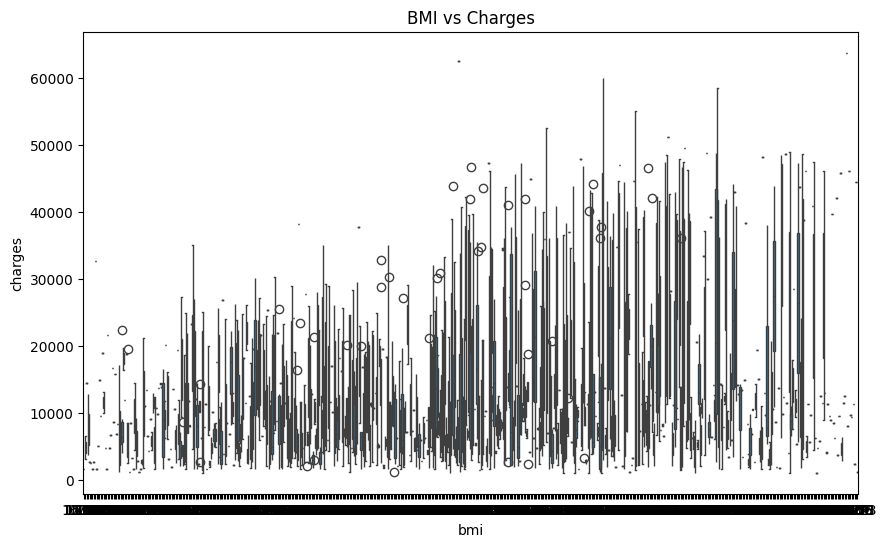

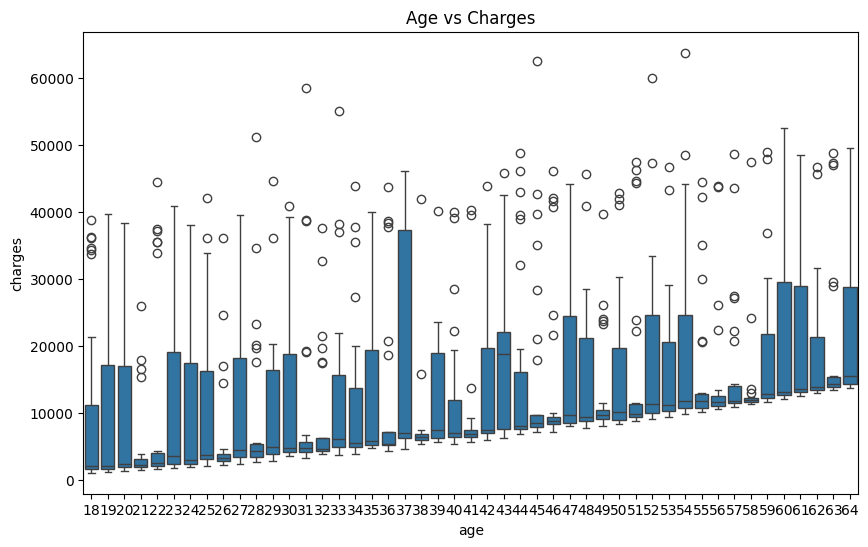

In [5]:
# BMI vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', y='charges', data=insurance_data)
plt.title('BMI vs Charges')
plt.show()

# Age vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='charges', data=insurance_data)
plt.title('Age vs Charges')
plt.show()


Correlation Heatmap for Numerical Features

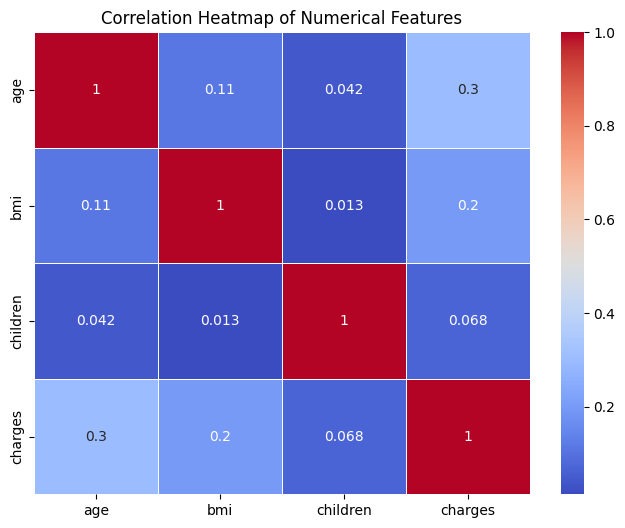

In [6]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(insurance_data[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Average Charges by Region

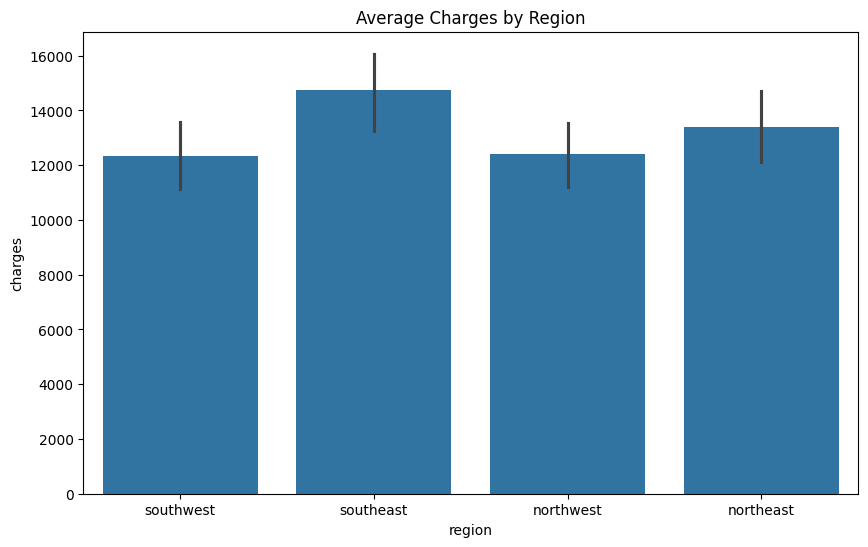

In [7]:
# Compare average charges by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=insurance_data)
plt.title('Average Charges by Region')
plt.show()


3. Data Preprocessing

Encode Categorical Variables Using One-Hot Encoding

In [8]:
# One-hot encoding for categorical variables
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Check the processed data
insurance_data.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
Scale Numerical Features

In [9]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
insurance_data[numerical_features] = scaler.fit_transform(insurance_data[numerical_features])

# Check the scaled data
insurance_data.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False


Split Dataset into Training and Validation Sets

In [10]:
# Split dataset into training (80%) and validation (20%) sets
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split sizes
X_train.shape, X_val.shape


((1070, 8), (268, 8))

4. Model Building

Baseline ANN

In [12]:
# Build a basic ANN
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
val_loss = model.evaluate(X_val, y_val)

print(f'Training Loss: {train_loss}')
print(f'Validation Loss: {val_loss}')


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 287308864.0000 - val_loss: 323414464.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323805728.0000 - val_loss: 323395456.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 335641152.0000 - val_loss: 323372512.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 320515264.0000 - val_loss: 323343136.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 313700096.0000 - val_loss: 323306272.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 302465088.0000 - val_loss: 323260928.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 297925152.0000 - val_loss: 323206432.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 302502624.0000 - val_loss: 323142688.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 346982048.0000 - val_loss: 323067584.0000
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 327519392.0000 - val_loss: 322981984.0000
E

Optimized ANN with Dropout, EarlyStopping, and ReduceLROnPlateau

In [13]:
# Build the optimized ANN with more layers and Dropout
optimized_model = Sequential()
optimized_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
optimized_model.add(Dropout(0.2))  # Dropout layer
optimized_model.add(Dense(64, activation='relu'))
optimized_model.add(Dropout(0.2))  # Dropout layer
optimized_model.add(Dense(1))  # Output layer for regression

# Compile the model
optimized_model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks: EarlyStopping and ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# Train the model
optimized_history = optimized_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                                        callbacks=[early_stop, reduce_lr], verbose=1)

# Evaluate the optimized model
train_loss_opt = optimized_model.evaluate(X_train, y_train)
val_loss_opt = optimized_model.evaluate(X_val, y_val)

print(f'Optimized Training Loss: {train_loss_opt}')
print(f'Optimized Validation Loss: {val_loss_opt}')


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 320150624.0000 - val_loss: 323342784.0000 - learning_rate: 0.0010
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 319670400.0000 - val_loss: 323103552.0000 - learning_rate: 0.0010
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 320993824.0000 - val_loss: 322445312.0000 - learning_rate: 0.0010
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308626784.0000 - val_loss: 321013408.0000 - learning_rate: 0.0010
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 317271104.0000 - val_loss: 318383424.0000 - learning_rate: 0.0010
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321027424.0000 - val_loss: 314213760.0000 - learning_rate: 0.0010
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 309631520.0000 - val_loss: 308019872.0000 - learning_rate: 0.0010
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 279030784.0000 - val_loss: 299731040.0000 - learning_rate: 0.0010
Epoch 9/100


5. Model Evaluation

Metrics: MAE, MSE, RMSE, R² Score

In [14]:
# Predict on the validation set
y_pred = optimized_model.predict(X_val)

# Calculate MAE, MSE, RMSE, and R² score
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MAE: 4065.6062921283824
MSE: 33438980.35990419
RMSE: 5782.644754773043
R²: 0.7846102828757986


Plot Actual vs Predicted Charges

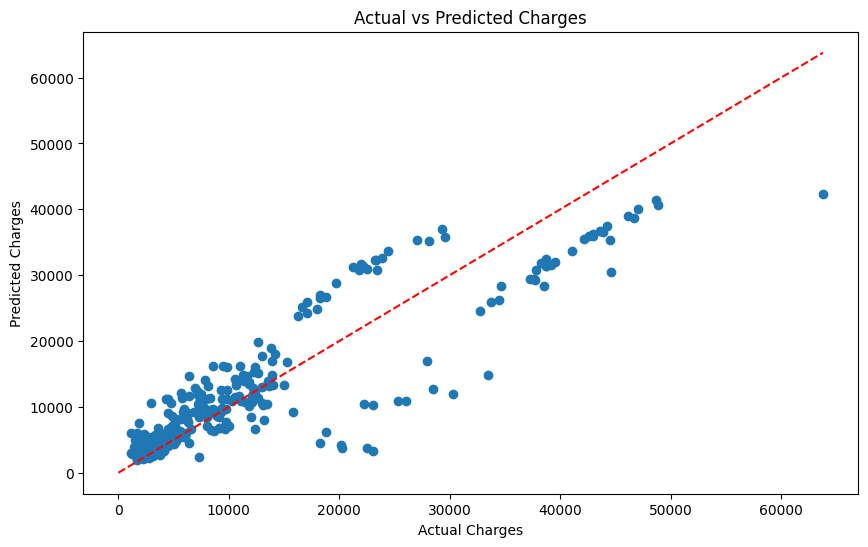

In [15]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred)
plt.plot([0, max(y_val)], [0, max(y_val)], color='red', linestyle='--')
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


Visualize Loss Curves

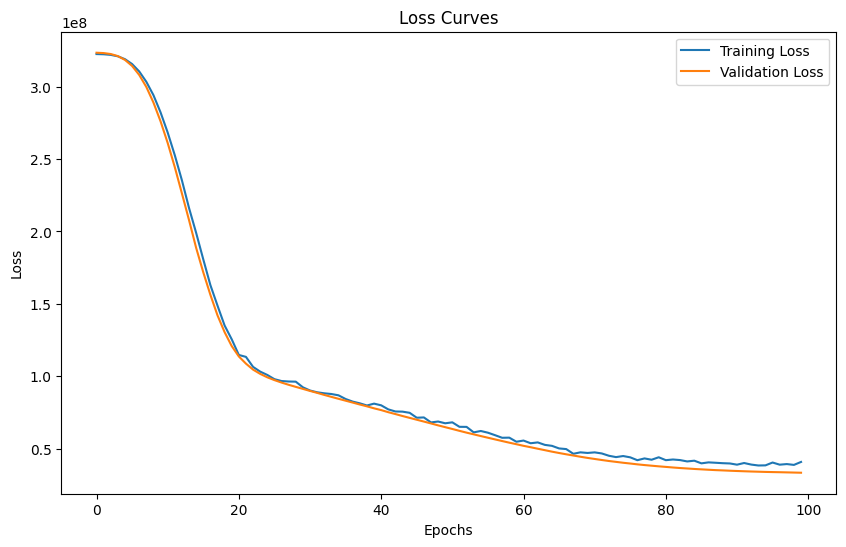

In [17]:
# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(optimized_history.history['loss'], label='Training Loss')
plt.plot(optimized_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
